In [26]:
import numpy as np
import pandas as pd
import math
from community import community_louvain
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
plt.rcParams['font.sans-serif'] = ['Microsoft Yahei']
plt.rcParams['axes.unicode_minus'] = False

## <center> read data

In [28]:
path = 'follow_matrix.csv'
#path = 'follow_matrix_500.csv'
data = pd.read_csv(path,index_col=0)
data = np.array(data)
G = nx.from_numpy_matrix(data, create_using=nx.DiGraph())

## <center> Louvain algorithm

In [ ]:
import community
import matplotlib.cm as cm
def louvain(G, pos):
    partition = nx.algorithms.community.louvain_communities(G, seed=2001)
    cmap = cm.get_cmap('viridis', len(partition))
    nodes = []
    communities = []
    for i in range(len(partition)):
        nodes = nodes + list(partition[i])
        communities = communities + [i] * len(partition[i])
    nx.draw_networkx_nodes(G, pos, nodes, node_size=15,
                           cmap=cmap, node_color=communities)
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()

    partition_dict = {k: v for k, v in zip(nodes, communities)}
    modularity = community.modularity(partition_dict, G)
    print([max(partition_dict.values()) + 1, modularity])

    return True

## <center>Degree Distribution

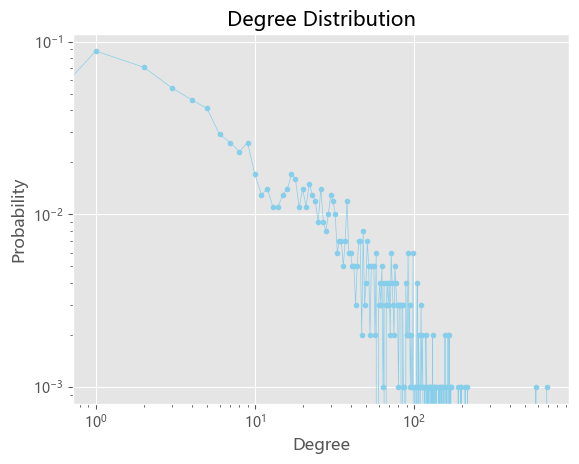

In [30]:
degree=nx.degree_histogram(G)#返回图中所有节点的度分布序列
x=range(len(degree))#生成X轴序列，从1到最大度
y=[z/float(sum(degree))for z in degree]#将频次转化为频率，利用列表内涵
plt.loglog(x,y,color="skyblue",linewidth=0.5,marker = 'o',markersize = 3)#在双对坐标轴上绘制度分布曲线
plt.title('Degree Distribution')
plt.ylabel('Probability')
plt.xlabel('Degree')
plt.show()#显示图表

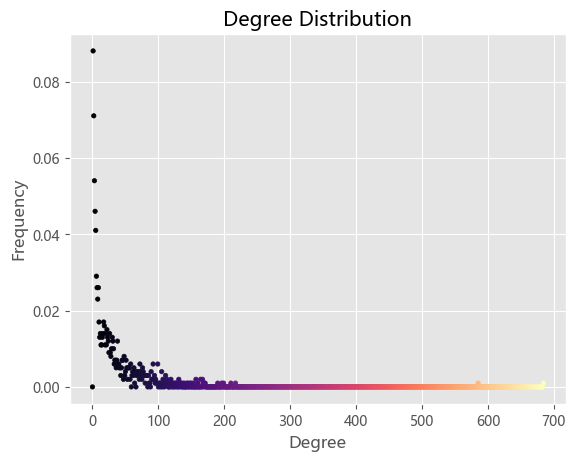

In [31]:
plt.scatter(x,y,s=10,c=x,cmap="magma")
plt.title('Degree Distribution')
plt.ylabel('Frequency')
plt.xlabel('Degree')
plt.show()

C:\Users\24151\AppData\Local\Temp\ipykernel_20608\1515283941.py:1: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(x),np.log(y),s=10,c=y,cmap="viridis")


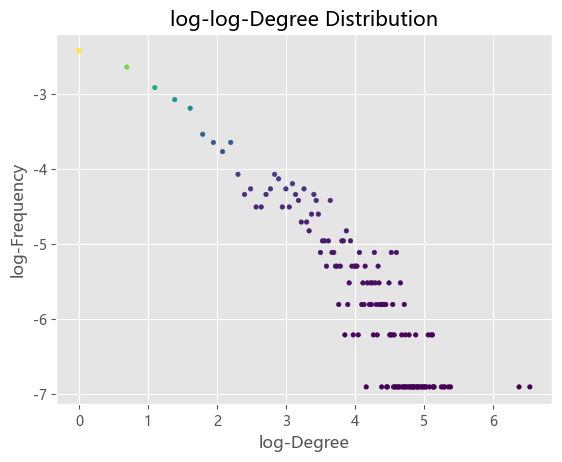

In [32]:
plt.scatter(np.log(x),np.log(y),s=10,c=y,cmap="viridis")
plt.title('log-log-Degree Distribution')
plt.ylabel('log-Frequency')
plt.xlabel('log-Degree')
plt.show()

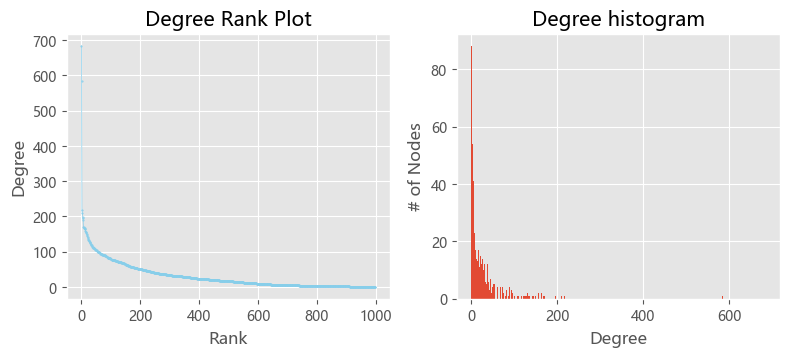

In [33]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)


ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "skyblue", marker="o",markersize = 0.5,linewidth = 0.5)
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

## <center>Clustering Coefficient

In [34]:
clustering = list(nx.clustering(G).values())

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


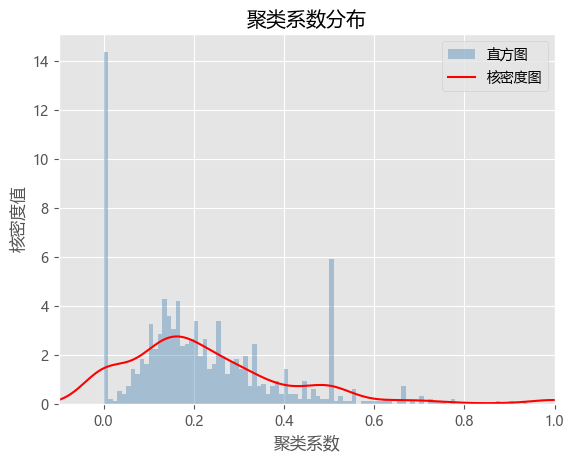

In [35]:
def plt_hist_pic(data_list, range_min, range_max, hist_size, xlabel_='聚类系数',ylabel_= '核密度值',title='聚类系数分布'):
    plt.style.use('ggplot')
    bins = np.arange(range_min, range_max, hist_size)
    sns.distplot(data_list, bins, kde = False, hist_kws = {'color':'steelblue'},norm_hist=True,label = ('直方图'))
    #plt.hist(data_list, bins, color='blue', alpha=0.5,density=True)#,weights = np.zeros_like(data_list) + 1 / len(data_list))
    sns.distplot(data_list, hist = False, kde_kws = {'color':'red', 'linestyle':'-'},norm_hist = True, label = ('核密度图'))
    #sns.kdeplot(data_list)
    plt.xlabel(xlabel_)
    plt.ylabel(ylabel_)
    plt.title(title)
    plt.legend()
    plt.xlim(range_min, range_max)
    plt.show()

plt_hist_pic(clustering,-0.1,1.0,0.01,)

## <center>centrality measurement

In [ ]:
G = G.to_undirected()
def draw_one(G,beta = 1):
    partition = community_louvain.best_partition(G)
    subnode = []
    for i in partition.keys():
        if partition[i] == 1:
            subnode.append(i)
    G = G.subgraph(subnode)
    pos = nx.spring_layout(G)

    degree_dict = nx.degree_centrality(G)
    max_center_value_degree = max(degree_dict.values())
    color_degree = []
    for i in degree_dict.keys():
        if degree_dict[i] > max_center_value_degree*0.5:
            color_degree.append("r")
        elif degree_dict[i] > max_center_value_degree*0.25:
            color_degree.append("b")
        else:
            color_degree.append([0.5, 0.5, 0.5])  # grey
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(231)
    ax1.set_title("degree centrality")
    nx.draw_networkx_nodes(G, pos, node_size=15, node_color=color_degree)
    nx.draw_networkx_edges(G, pos, alpha=0.3)

    eigen_dict = nx.eigenvector_centrality(G)
    max_center_value_eigen = max(eigen_dict.values())
    color_eigen = []
    for i in eigen_dict.keys():
        if eigen_dict[i] > max_center_value_eigen*0.5:
            color_eigen.append("r")
        elif eigen_dict[i] > max_center_value_eigen*0.25:
            color_eigen.append("b")
        else:
            color_eigen.append([0.5, 0.5, 0.5])  # grey
    ax2 = fig.add_subplot(232)
    ax2.set_title("eigenvector centrality")
    nx.draw_networkx_nodes(G, pos, node_size=15, node_color=color_eigen)
    nx.draw_networkx_edges(G, pos, alpha=0.3)

    w, v = np.linalg.eig(nx.to_numpy_matrix(G))
    rho = max(abs(w))
    alpha = 0.85/rho
    
    dict_katz = nx.katz_centrality(G, alpha, beta)
    max_center_value_katz = max(dict_katz.values())
    color_katz = []
    for i in dict_katz.keys():
        if dict_katz[i] > max_center_value_katz*0.5:
            color_katz.append("r")
        elif dict_katz[i] > max_center_value_katz*0.25:
            color_katz.append("b")
        else:
            color_katz.append([0.5, 0.5, 0.5])  # grey
    ax3 = fig.add_subplot(233)
    ax3.set_title("Katz centrality")
    nx.draw_networkx_nodes(G, pos, node_size=15, node_color=color_katz)
    nx.draw_networkx_edges(G, pos, alpha=0.3)

    dict_pr = nx.pagerank(G, alpha=0.85)
    max_center_value_pr = max(dict_pr.values())
    color_pr = []
    for i in dict_pr.keys():
        if dict_pr[i] > max_center_value_pr*0.5:
            color_pr.append("r")
        elif dict_pr[i] > max_center_value_pr*0.25:
            color_pr.append("b")
        else:
            color_pr.append([0.5, 0.5, 0.5])  # grey
    ax4 = fig.add_subplot(234)
    ax4.set_title("pagerank centrality")
    nx.draw_networkx_nodes(G, pos, node_size=15, node_color=color_pr)
    nx.draw_networkx_edges(G, pos, alpha=0.3)

    dict_bet = nx.betweenness_centrality(G)
    max_center_value_bet = max(dict_bet.values())
    color_bet = []
    for i in dict_bet.keys():
        if dict_bet[i] > max_center_value_bet*0.5:
            color_bet.append("r")
        elif dict_bet[i] > max_center_value_bet*0.25:
            color_bet.append("b")
        else:
            color_bet.append([0.5, 0.5, 0.5])  # grey
    ax5 = fig.add_subplot(235)
    ax5.set_title("betweenness centrality")
    nx.draw_networkx_nodes(G, pos, node_size=15, node_color=color_bet)
    nx.draw_networkx_edges(G, pos, alpha=0.3)

    dict_cls = nx.closeness_centrality(G)
    max_center_value_cls = max(dict_cls.values())
    color_cls = []
    for i in dict_cls.keys():
        if dict_cls[i] > max_center_value_cls*0.8:
            color_cls.append("r")
        elif dict_cls[i] > max_center_value_cls*0.5:
            color_cls.append("b")
        else:
            color_cls.append([0.5, 0.5, 0.5])  # grey
    ax6 = fig.add_subplot(236)
    ax6.set_title("closeness centrality")
    nx.draw_networkx_nodes(G, pos, node_size=15, node_color=color_cls)
    nx.draw_networkx_edges(G, pos, alpha=0.3)
    plt.show()
    
    return True

draw_one(G)